<a href="https://colab.research.google.com/github/presleyyyy/Presley-data-science/blob/main/Supervised_Learning_Regression_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What You're Aiming For

In this checkpoint, you are going to work on the '5G-Energy consumption' dataset that was provided by the international telecommunication union (ITU) in 2023 as part of a global challenge or competition for data scientists all over the world to solve the 5G energy consumption modelling using machine learning techniques.

The competition is taking place from 2023-07-05 to 2023-09-30. Fore more information click here.

Checkpoint problematic : Network operational expenditure (OPEX) already accounts for around 25 percent of the total telecom operator’s cost, and 90 percent of it is spent on large energy bills. More than 70 percent of this energy is estimated to be consumed by the radio access network (RAN), particularly by the base stations (BSs). Thus, the objective is to build and train a ML model to estimate the energy consumed by different 5G base stations taking into consideration the impact of various engineering configurations, traffic conditions, and energy-saving methods.

Dataset description : This dataset is derived from the original copy and simplified for learning purposes. It includes cell-level traffic statistics of 4G/5G sites collected on different days.

➡️ Dataset link

https://i.imgur.com/Agu9zeP.jpg




Instructions

1. Import you data and perform basic data exploration phase
. Display general information about the dataset
. Create a pandas profiling reports to gain insights into the dataset
. Handle Missing and corrupted values
. Remove duplicates, if they exist
. Handle outliers, if they exist
. Encode categorical features
2. Select your target variable and the features
3. Split your dataset to training and test sets
4. Based on your data exploration phase select a ML regression algorithm and train it on the training set
5. Assess your model performance on the test set using relevant evaluation metrics
6. Discuss with your cohort alternative ways to improve your model performance

## **Load data**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/5G_energy_consumption_dataset.csv')
df

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719
...,...,...,...,...,...,...
92624,20230102 170000,B_1018,14.648729,0.087538,0.0,7.325859
92625,20230102 180000,B_1018,14.648729,0.082635,0.0,7.325859
92626,20230102 210000,B_1018,13.452915,0.055538,0.0,7.325859
92627,20230102 220000,B_1018,13.602392,0.058077,0.0,7.325859


## **Data preparation**

### data exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [ ]:
#sum null values
missing_values= df.isnull().sum()
missing_values

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64

In [ ]:
#droping the duplicates
df_no_duplicates = df.drop_duplicates()
print(df_no_duplicates.head())

              Time   BS     Energy      load  ESMODE   TXpower
0  20230101 010000  B_0  64.275037  0.487936     0.0  7.101719
1  20230101 020000  B_0  55.904335  0.344468     0.0  7.101719
2  20230101 030000  B_0  57.698057  0.193766     0.0  7.101719
3  20230101 040000  B_0  55.156951  0.222383     0.0  7.101719
4  20230101 050000  B_0  56.053812  0.175436     0.0  7.101719


## **Data transformation**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
#changing the data type string to integer
for column in ['BS']:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,0,56.053812,0.175436,0.0,7.101719
...,...,...,...,...,...,...
92624,20230102 170000,10,14.648729,0.087538,0.0,7.325859
92625,20230102 180000,10,14.648729,0.082635,0.0,7.325859
92626,20230102 210000,10,13.452915,0.055538,0.0,7.325859
92627,20230102 220000,10,13.602392,0.058077,0.0,7.325859


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  int64  
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.2+ MB


### Data seperation as X and y

In [ ]:
y = df['Energy']
y

0        64.275037
1        55.904335
2        57.698057
3        55.156951
4        56.053812
           ...    
92624    14.648729
92625    14.648729
92626    13.452915
92627    13.602392
92628    13.303438
Name: Energy, Length: 92629, dtype: float64

In [ ]:
X = df.drop(['Energy', 'Time'],axis=1)
X

,BS,load,ESMODE,TXpower
0,0,0.487936,0.0,7.101719
1,0,0.344468,0.0,7.101719
2,0,0.193766,0.0,7.101719
3,0,0.222383,0.0,7.101719
4,0,0.175436,0.0,7.101719
...,...,...,...,...
92624,10,0.087538,0.0,7.325859
92625,10,0.082635,0.0,7.325859
92626,10,0.055538,0.0,7.325859
92627,10,0.058077,0.0,7.325859


### Data spitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [ ]:
print(X_train.head())
print(y_train.head())

        BS      load  ESMODE   TXpower
63549  533  0.034620     0.0  6.427504
36105  259  0.064800     0.0  6.427504
16256   59  0.311160     0.0  6.427504
67275  571  0.388883     0.0  6.875934
11441   13  0.037440     0.0  6.427504
63549    18.086697
36105    19.730942
16256    25.710015
67275    35.426009
11441    18.535127
Name: Energy, dtype: float64


In [ ]:
print(X_train.dtypes)
print(y_train.dtypes)

BS           int64
load       float64
ESMODE     float64
TXpower    float64
dtype: object
float64


In [ ]:
X_train

,BS,load,ESMODE,TXpower
63549,533,0.034620,0.000000,6.427504
36105,259,0.064800,0.000000,6.427504
16256,59,0.311160,0.000000,6.427504
67275,571,0.388883,0.000000,6.875934
11441,13,0.037440,0.000000,6.427504
...,...,...,...,...
65615,553,0.215870,0.000000,7.100897
77655,674,0.011300,1.896944,6.875934
79683,695,0.295630,0.000000,6.875934
56088,460,0.070530,0.000000,7.100897


In [ ]:
X_test

,BS,load,ESMODE,TXpower
75490,651,0.019420,0.0,6.875934
42274,320,0.043646,0.0,6.875934
49027,389,0.088530,0.0,6.875934
5576,459,0.112239,0.0,6.427504
50777,406,0.353620,0.0,6.427504
...,...,...,...,...
88383,782,0.040560,0.0,6.427504
1783,84,0.168855,0.0,7.100897
14013,38,0.025372,0.0,7.100897
67916,577,0.796777,0.0,6.875934


## **Model Buliding**

## **Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**applying the model to make a prediction**

In [ ]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
y_lr_train_pred

array([16.30496207, 17.94246507, 26.22390514, ..., 31.38797724,
       28.49771977, 23.94506478])

In [ ]:
y_lr_test_pred

array([22.77289731, 24.36466773, 25.61016096, ..., 28.12500374,
       47.51288724,  6.65339742])

***evaluate model performance***

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 =r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR MSE (Train):', lr_train_mse)
print('LR R2 (Train):', lr_train_r2)
print('LR MSE (Test):', lr_test_mse)
print('LR R2 (Test):', lr_test_r2)

LR MSE (Train): 86.4555524930067
LR R2 (Train): 0.553978501099031
LR MSE (Test): 86.55842858733565
LR R2 (Test): 0.5572643465808441


In [ ]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_test_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.clumns=['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

<ipython-input-23-459fcc7cd74a>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  lr_results.clumns=['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']


In [ ]:
lr_results

,0,1,2,3,4
0,Linear regression,86.455552,0.557264,86.558429,0.557264


**Training the model**

**Model comparison**

In [ ]:
df_models = pd.concat([lr_results], axis=0).reset_index(drop=True)
df_models

,0,1,2,3,4
0,Linear regression,86.455552,0.557264,86.558429,0.557264


## **Data visualisation of prediction results**

Text(0.5, 0, 'experimental Eenergy')

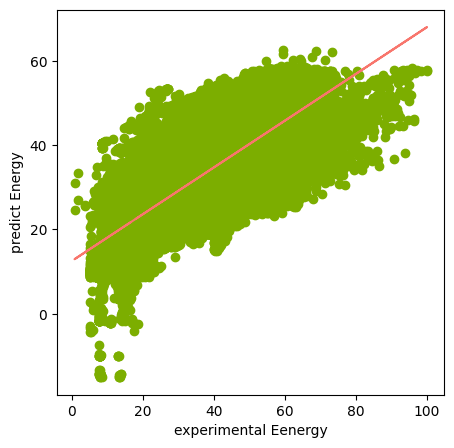

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" )

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('predict Energy')
plt.xlabel('experimental Eenergy')